In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
#import kagglehub
#rahmasleam_flowers_dataset_path = kagglehub.dataset_download('rahmasleam/flowers-dataset')

#print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import tensorflow as tf
device = "/GPU:0" if tf.config.list_physical_devices('GPU') else "/CPU:0"

In [ ]:
import tensorflow as tf

# 📌 กำหนดพาธของชุดข้อมูล
data_dir = "/kaggle/input/flowers-dataset/flower_photos"

# 📌 โหลดชุดข้อมูลจากโฟลเดอร์ และแบ่งเป็น Training / Testing (80/20)
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    image_size=(224, 224),
    batch_size=32,
    validation_split=0.2,
    subset="training",
    seed=42
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    image_size=(224, 224),
    batch_size=32,
    validation_split=0.2,
    subset="validation",
    seed=42
)

# 📌 Normalize ข้อมูลให้เหมือน PyTorch (-1 ถึง 1)
normalization_layer = tf.keras.layers.Rescaling(1./127.5, offset=-1)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

# 📌 แสดงขนาดของชุดข้อมูล
print(f"Training set size: {len(train_ds)} batches")
print(f"Testing set size: {len(test_ds)} batches")

NotFoundError: Could not find directory /kaggle/input/flowers-dataset/flower_photos

In [ ]:
import matplotlib.pyplot as plt
classes= [
    'daisy',
    'dandelion',
    'roses',
    'sunflowers',
    'tulips'
]

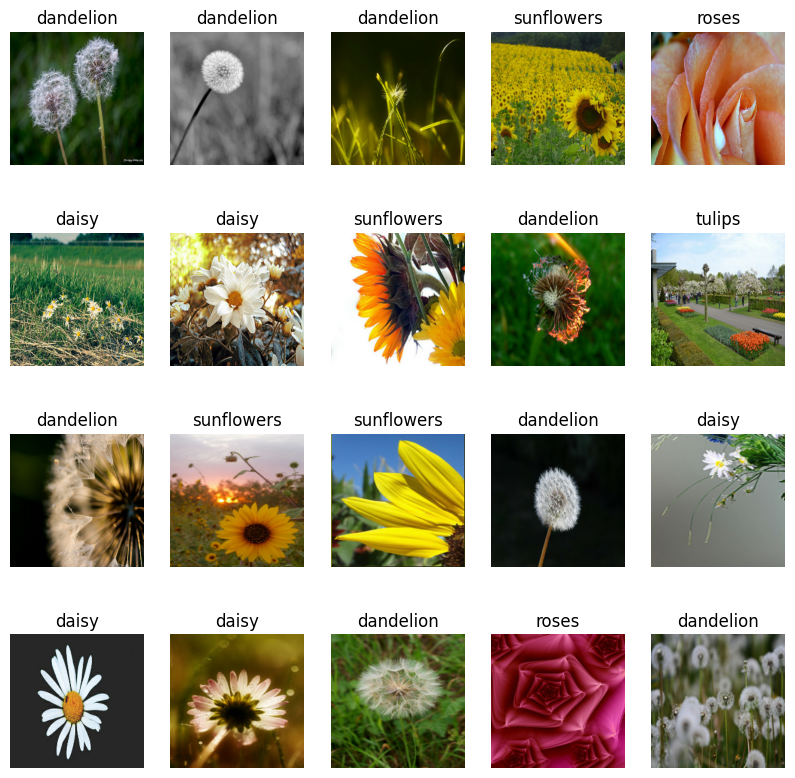

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

imageList = []

# ดึงตัวอย่างจาก train_ds (ใช้ .take(1) เพื่อเอา batch แรก)
for images, labels in train_ds.take(1):
    for i in range(min(20, images.shape[0])):  # จำกัดแค่ 20 รูป
        img = images[i].numpy()  # แปลงเป็น numpy
        img = ((img + 1) * 127.5).astype("uint8")  # 🔥 แปลงค่า pixel กลับมาเป็น [0,255]

        label = classes[labels[i].numpy()]  # ดึงชื่อคลาส
        imageList.append((img, label))

# ✅ ทดสอบแสดงภาพ
plt.figure(figsize=(10, 10))
for i, (img, label) in enumerate(imageList):
    plt.subplot(4, 5, i + 1)
    plt.imshow(img)
    plt.title(label)
    plt.axis("off")

plt.show()


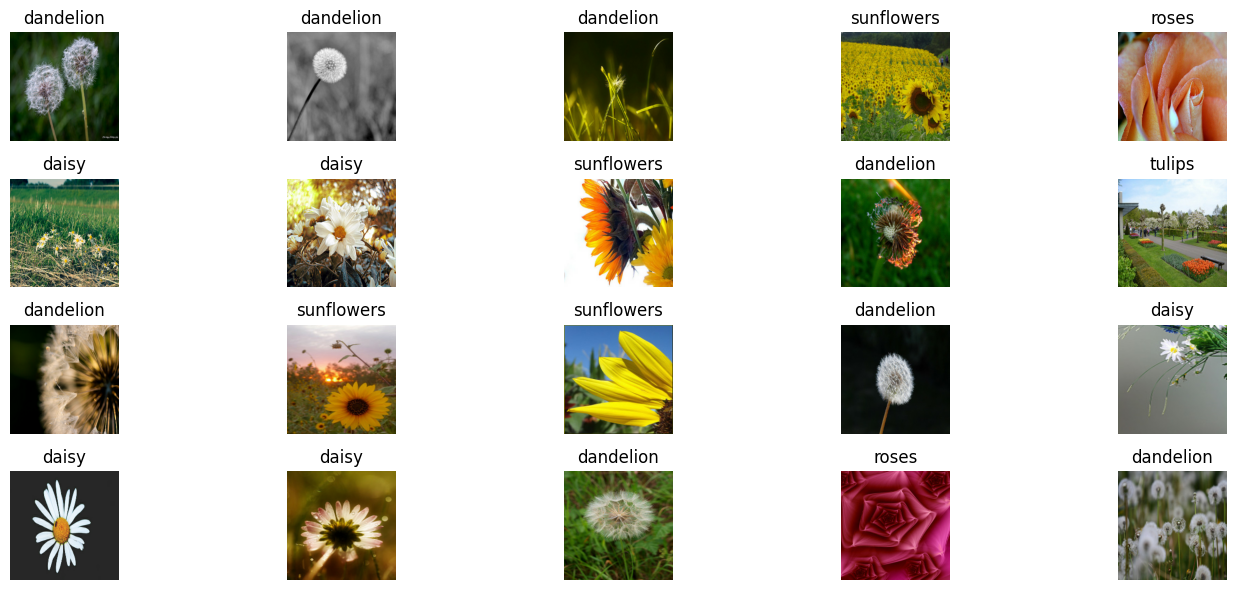

In [ ]:
fig, axes = plt.subplots(4, 5, figsize=(15, 6))
axes = axes.flatten()  # ทำให้เป็น 1D array

for i, (img, label) in enumerate(imageList):
    if i >= len(axes):  # ป้องกัน IndexError ถ้ามีรูปน้อยกว่า 20
        break
    axes[i].imshow(img)  # แสดงภาพ
    axes[i].set_title(label)  # ตั้งชื่อคลาส
    axes[i].axis('off')  # ซ่อนแกน

plt.tight_layout()  # จัดระยะให้ดูสวยงาม
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# กำหนด input shape
input_shape = (224, 224, 3)

model = keras.Sequential([
    # First Convolutional Layer
    layers.Conv2D(16, kernel_size=3, strides=1, padding="same", activation="relu", input_shape=input_shape),
    layers.MaxPooling2D(pool_size=2, strides=2),
    layers.BatchNormalization(),

    # Second Convolutional Layer
    layers.Conv2D(32, kernel_size=3, strides=1, padding="same", activation="relu"),
    layers.MaxPooling2D(pool_size=2, strides=2),
    layers.BatchNormalization(),

    # Third Convolutional Layer
    layers.Conv2D(64, kernel_size=3, strides=1, padding="same", activation="relu"),
    layers.MaxPooling2D(pool_size=2, strides=2),

    # Fourth Convolutional Layer
    layers.Conv2D(128, kernel_size=3, strides=1, padding="same", activation="relu"),
    layers.MaxPooling2D(pool_size=2, strides=2),
    layers.Dropout(0.2),

    # Fifth Convolutional Layer
    layers.Conv2D(256, kernel_size=3, strides=1, padding="same", activation="relu"),
    layers.MaxPooling2D(pool_size=2, strides=2),
    layers.Dropout(0.3),

    # Flatten Layer
    layers.Flatten(),

    # Fully Connected Layers
    layers.Dense(1024, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(256, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(5, activation="softmax")  # Output layer with 5 classes
])

# แสดงสรุปโมเดล
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 112, 112, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 56, 56, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │      12,846,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 13,938,853 (53.17 MB)

 Trainable params: 13,938,757 (53.17 MB)

 Non-trainable params: 96 (384.00 B)

In [ ]:
import tensorflow as tf

# กำหนด Loss Function และ Optimizer
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0007),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=["accuracy"]
)


In [ ]:
import tensorflow as tf

# กำหนดจำนวน epochs
epochs = 10

# เก็บค่าความสูญเสียและความแม่นยำ
epoch_count = []
loss_values = []
test_loss_values = []
train_acc = []
test_acc = []

# Callback สำหรับบันทึกโมเดลที่ดีที่สุด
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    "best_model.keras", save_best_only=True, monitor="val_accuracy", mode="max"
)

# เทรนโมเดลโดยใช้ `train_ds` และ `test_ds`
history = model.fit(
    train_ds,
    epochs=epochs,
    validation_data=test_ds,
    callbacks=[checkpoint]  # บันทึกโมเดลที่ดีที่สุด
)

# ดึงค่าความสูญเสียและความแม่นยำจาก history
epoch_count = list(range(epochs))
loss_values = history.history["loss"]
test_loss_values = history.history["val_loss"]
train_acc = history.history["accuracy"]
test_acc = history.history["val_accuracy"]

# แสดงผลลัพธ์ของแต่ละ epoch
for epoch in range(epochs):
    print(
        f"Epoch: {epoch} | Loss: {loss_values[epoch]:.2f} | Test Loss: {test_loss_values[epoch]:.2f} | "
        f"Train Accuracy: {train_acc[epoch] * 100:.2f}% | Test Accuracy: {test_acc[epoch] * 100:.2f}%"
    )


Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 116s 1s/step - accuracy: 0.3815 - loss: 1.3651 - val_accuracy: 0.3774 - val_loss: 1.5521
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 118s 1s/step - accuracy: 0.4852 - loss: 1.1892 - val_accuracy: 0.4264 - val_loss: 1.4334
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 116s 1s/step - accuracy: 0.5509 - loss: 1.0631 - val_accuracy: 0.5627 - val_loss: 1.2015
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 115s 1s/step - accuracy: 0.6208 - loss: 0.9758 - val_accuracy: 0.5463 - val_loss: 1.1344
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 119s 1s/step - accuracy: 0.6500 - loss: 0.8796 - val_accuracy: 0.6362 - val_loss: 1.0110
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 117s 1s/step - accuracy: 0.6862 - loss: 0.8426 - val_accuracy: 0.6649 - val_loss: 0.9571
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 118s 1s/step - accuracy: 0.7358 - loss: 0.6925 - val_accuracy: 0.6894 - val_loss: 0.8752
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 118s 1s/step - accuracy: 0.7623 - loss: 0.6384 - val_accuracy: 0.6894 - v

In [ ]:
def print_accuracy(model):
    loss, accuracy = model.evaluate(test_ds)
    print(f"Test Accuracy: {accuracy * 100:.2f}%")

# เรียกใช้งานฟังก์ชัน
print_accuracy(model)

23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 343ms/step - accuracy: 0.6945 - loss: 0.9658
Test Accuracy: 70.71%


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# 📌 กำหนด Label Mapping (เปลี่ยนให้ตรงกับที่ใช้เทรน)
class_labels = ["Daisy", "Dandelion", "Roses", "Sunflowers", "Tulips"]  # ปรับตาม dataset

# 📌 โหลดภาพที่อัปโหลด
image_path = "/content/img9.jpeg"  # เปลี่ยนเป็น path ของภาพที่ต้องการ
img = image.load_img(image_path, target_size=(224, 224))  # ปรับขนาดให้ตรงกับโมเดล

# 📌 แปลงภาพเป็นอาร์เรย์
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # เพิ่มมิติให้เป็น (1, 224, 224, 3)
img_array = img_array / 127.5 - 1  # 📌 Normalize เหมือนตอนเทรน

# 📌 โหลดโมเดลที่เทรนไว้แล้ว
model = tf.keras.models.load_model("/content/flower_type.h5")  # เปลี่ยนเป็น path ของโมเดลที่บันทึกไว้

# 📌 ทำนายผลลัพธ์
predictions = model.predict(img_array)

# 📌 แปลงค่าทำนายเป็นคลาสที่คาดการณ์
predicted_class = np.argmax(predictions, axis=1)[0]  # ดึงคลาสที่มีค่าความน่าจะเป็นสูงสุด

# 📌 แสดงภาพพร้อมผลลัพธ์
plt.imshow(img)
plt.axis("off")
plt.title(f"Predicted Class: {class_labels[predicted_class]}")
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/content/img9.jpeg'